<a href="https://colab.research.google.com/github/xdomodomox/colab/blob/main/%E5%A4%A9%E7%9C%9F%E9%A0%90%E6%B8%AC%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import mean_squared_error #MSE,RMSE
from sklearn.metrics import mean_absolute_percentage_error #MAPE

# 讀取股票數據
data = pd.read_csv('/content/drive/MyDrive/ANN_Timeseries_Forecast_python_demo/Data/Close.csv')

data.Date=pd.to_datetime(data.Date)

split =int(0.8*data.shape[0])
Train,Test  = data[0:split] , data[split:]

Train

,Date,Close,Lag_1,Lag_2,Lag_3
0,2010-01-07,550.000000,563.725464,556.862732,555.882324
1,2010-01-08,539.215698,550.000000,563.725464,556.862732
2,2010-01-11,547.058838,539.215698,550.000000,563.725464
3,2010-01-12,547.058838,547.058838,539.215698,550.000000
4,2010-01-13,536.274536,547.058838,547.058838,539.215698
...,...,...,...,...,...
2140,2018-10-11,210.500000,228.500000,233.500000,234.500000
2141,2018-10-12,220.000000,210.500000,228.500000,233.500000
2142,2018-10-15,221.000000,220.000000,210.500000,228.500000
2143,2018-10-16,222.000000,221.000000,220.000000,210.500000


In [ ]:
# 擷取最後一天的股價


# 使用天真預測法預測未來股價
future_price = np.full_like(Test['Close'], Test['Lag_1'])

# 計算均方根誤差(RMSE)作為基準值的損失函數
baseline_rmse = np.sqrt(mean_squared_error(Test['Close'], future_price))

print('天真預測法的RMSE:', baseline_rmse)


天真預測法的RMSE: 11.000952218815897


<Figure size 3600x3000 with 0 Axes>

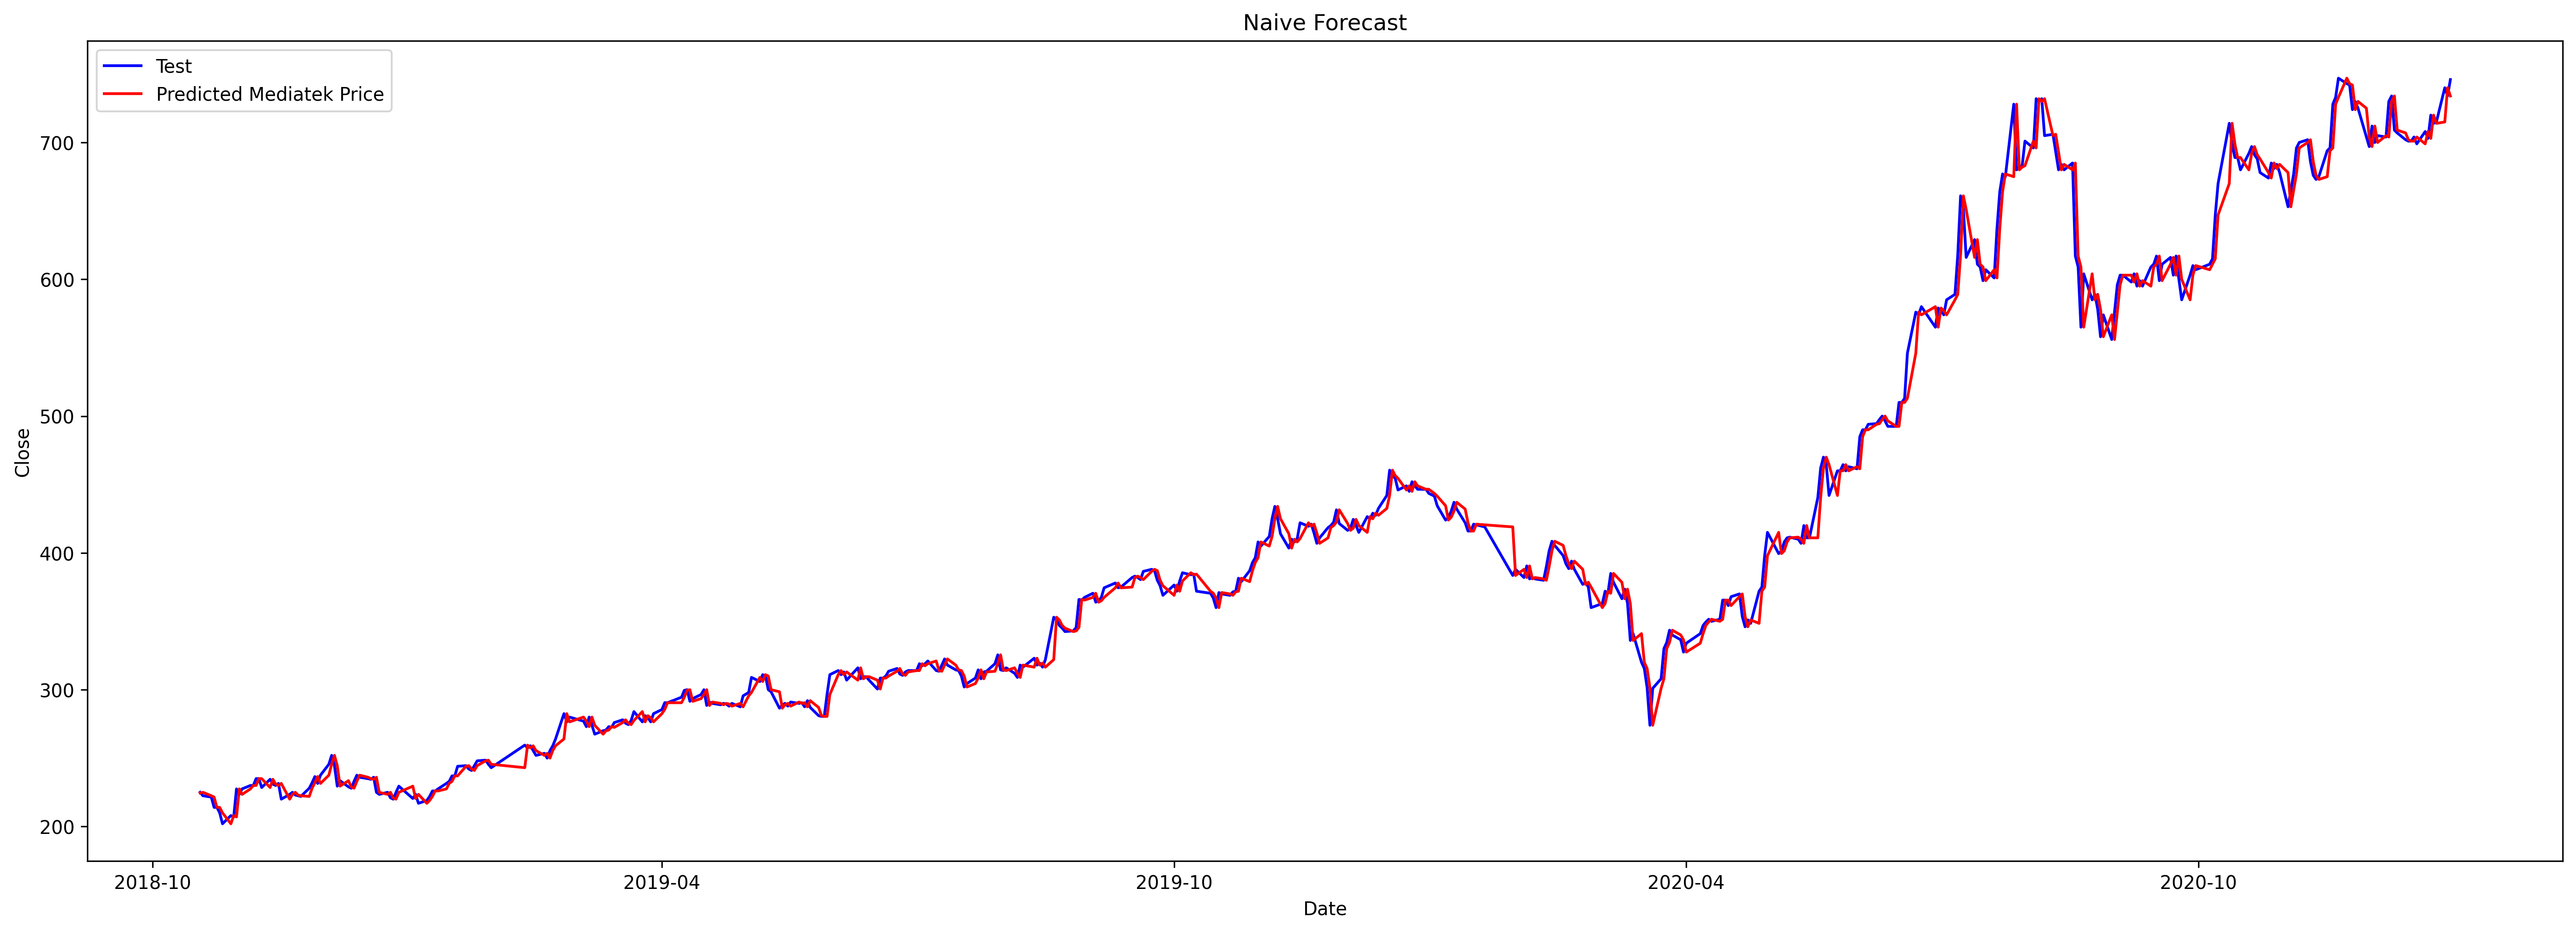

In [ ]:

plt.figure(figsize=(12,10),dpi=300)
fig= plt.figure(figsize = (24,8),dpi=300)
axes = plt.gca()

fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

fig.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))


plt.plot(Test['Date'],Test['Close'], color = 'blue', label = 'Test')
plt.plot(Test['Date'],future_price, color = 'red', label = 'Predicted Mediatek Price')
plt.title('Naive Forecast')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()

In [ ]:
# Symmetric Mean Absolute Percentage Error (SMAPE)
def SMAPE_calulate(y_true, y_pred):
    n = len(y_true)
    SMAPE=(100 / n) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))
    return SMAPE

# Relative Absolute Error (RAE)
def RAE_calculate(y_true, y_pred):
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    return RAE

# Mean Relative Absolute Error (MRAE)
def MRAE_calculate(y_true, y_pred):
    n=len(y_true)
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    MRAE=RAE/n
    return MRAE

# Median Relative Absolute Error (MdRAE) comparing with benchmark
# Note: By default, the bench value is the mean of actual value
def MdRAE_calculate(y_true, y_pred, bench=None):
    if bench==None:
        bench=np.mean(y_true)
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE,bench
    else:
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE

# Relative Squared Error (RSE) & Root Relative Squared Error (RRSE)
def RSE_calculate(y_true, y_pred, Root=False):
    mse = np.mean((y_true - y_pred)**2)
    denominator = np.var(y_true)
    RSE=mse/denominator

    if Root==True:
        return np.sqrt(RSE)
    else:
        return RSE

In [ ]:
actual_price=Test['Close']
predicted_price = Test['Lag_1']

MAE=mean_absolute_error(actual_price,predicted_price)
MSE=mean_squared_error(actual_price,predicted_price,squared=True)
RMSE=mean_squared_error(actual_price,predicted_price,squared=False)
MAPE=mean_absolute_percentage_error(actual_price,predicted_price)
SMAPE=SMAPE_calulate(actual_price,predicted_price)
RAE=RAE_calculate(actual_price,predicted_price)
MRAE=MRAE_calculate(actual_price,predicted_price)
MdRAE=MdRAE_calculate(actual_price,predicted_price)
RSE=RSE_calculate(actual_price,predicted_price,Root=False)
RRSE=RSE_calculate(actual_price,predicted_price,Root=True)

print('MAE:',round(MAE,3))
print('MSE:',round(MSE,3))
print('RMSE:',round(RMSE,3))
print('MAPE:',round(MAPE*100,3),'%')
print('SMAPE:',round(SMAPE,3),'%')
print('RAE:',round(RAE,3))
print('MRAE:',MRAE)
print('MdRAE:',round(MdRAE[0],3),'bench:',round(MdRAE[1],3))
print('RSE:',round(RSE,3))
print('RRSE:',round(RRSE,3))

MAE: 7.169
MSE: 121.021
RMSE: 11.001
MAPE: 1.695 %
SMAPE: 1.699 %
RAE: 0.056
MRAE: 0.00010337141735599519
MdRAE: 0.042 bench: 416.059
RSE: 0.005
RRSE: 0.07
